# KNN for Linear Regression

In [20]:
import numpy as np
import sklearn as sk

In [21]:
import mglearn 
import matplotlib.pyplot as plt

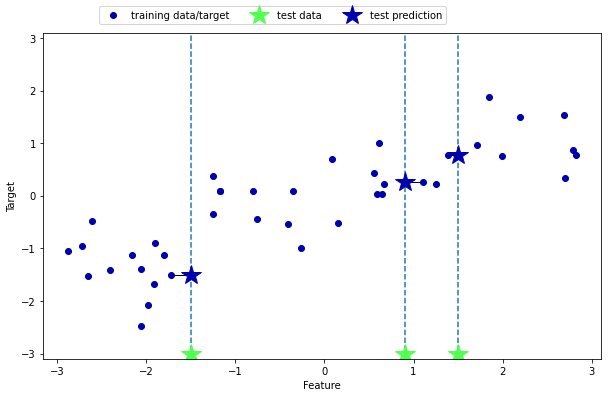

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

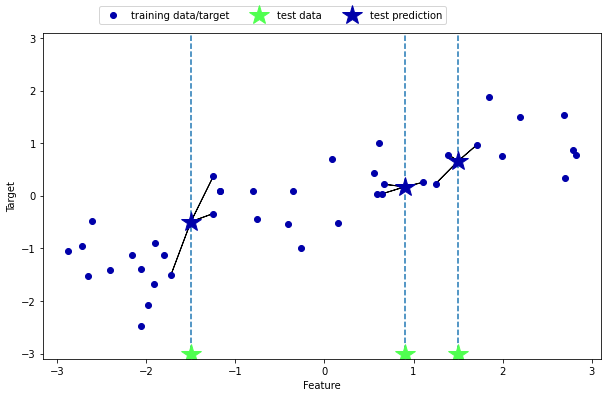

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [25]:
print(reg.score(X_test, y_test))

0.8344172446249605


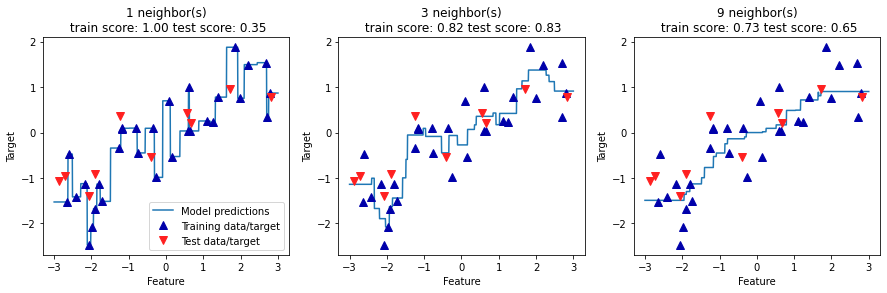

In [26]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0),   
             markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, 
              y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

Interesting parameters for KNR
<br>
1. weights : {'uniform', 'distance'}
2. metric : {'minkowski', 'euclidean', 'manhattan', 'chebyshev' ...}
3. p : int (minkowski distance power, default = 2)

For more information visit
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

# Try to implement yourself

Hints and subtasks
1. You can use the same dataset (X, y)
2. You will need distance function
3. You will need to find K closest points to the given one. You may start with the simple implementation of this algorithm.
3. In the same graphic draw train and test scores when changing K parameter (First try to imagine how should this look?).

In [27]:
# 1. this function takes the point_of_interest
# 2. finds the nearest number_of_neighbours neighbours
# 3. returns the mean of their y's

# seems that this will work also for the N-dimensional datasets (checked)

def knnr_algorithm(point_of_interest, x_train, y_train, number_of_neighbours):
    diff = np.c_[np.linalg.norm(x_train - point_of_interest, axis = 1), y_train]
    ddiff = diff[diff[:, 0].argsort()]
    
    y_pred = np.mean(ddiff[: number_of_neighbours, 1])

    return y_pred

In [28]:
# as an example take the above dataset and predict the value at x = 1.666 using 5 nearest neighbours
knnr_algorithm(1.666, X_train, y_train, 5)

1.0267781590627743

In [29]:
#compare with the KNeighborsRegressor: as expected, two algorithms give the same outputs
reg = KNeighborsRegressor(n_neighbors=5)

reg.fit(X_train, y_train)
reg.predict(np.array([[1.666]]))

array([1.02677816])

In [30]:
# take 3D dataset
xx_train = np.array([[1.2313, 0.1231, 1.123131],
                     [0.7, -0.5,0.25],
                     [0.3333, -0.21,2.33]])

yy_train = y_train[:3]

point = np.array([[1/2, -1/2, 1/2]])

knnr_algorithm(point, xx_train, yy_train, 3)

0.3865370811643727

In [31]:
#compare with the KNeighborsRegressor: as expected, two algorithms give the same outputs
xx_train = np.array([[1.2313, 0.1231, 1.123131],
                     [0.7, -0.5,0.25],
                     [0.3333, -0.21,2.33]])

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(xx_train, yy_train)
reg.predict(np.array([[1/2, -1/2, 1/2]]))

array([0.38653708])

In [32]:
# now, we implement a function that takes input test arrays generates and array of outputs
def predict_func(x_test, x_train, y_train, number_of_neighbours):
    y_pred_vector = np.zeros(len(x_test))

    for i in range(len(x_test)):
        y_pred_vector[i] = knnr_algorithm(x_test[i], x_train, y_train, number_of_neighbours)
    
    return y_pred_vector

In [33]:
# use this function to predict values for some x-es
predict_func(np.array([[1.666],[ 0.232485038409], [-1.11123123]]), X_train, y_train, 3)

array([ 1.13671923,  0.06853936, -0.05396539])

In [34]:
#compare with the KNeighborsRegressor: two algorithms generate the same outputs
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
reg.predict(np.array([[1.666],[ 0.232485038409], [-1.11123123]]))

array([ 1.13671923,  0.06853936, -0.05396539])

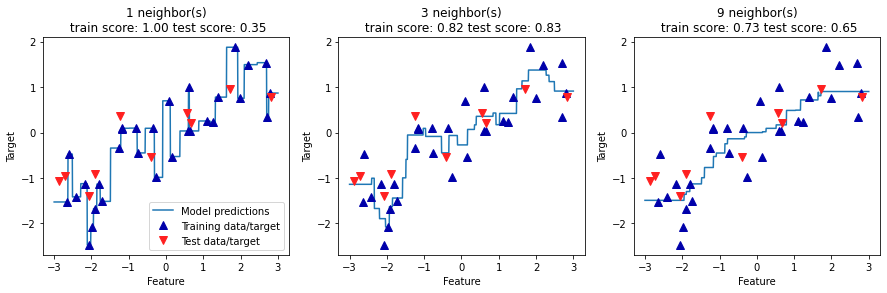

In [35]:
# we make similar plots as above using my algorithm + scores are also for my algorithm
# and see that everything is absolutely the same

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    
    ax.plot(line, predict_func(line, X_train, y_train, n_neighbors))
    
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              sk.metrics.r2_score(y_train, predict_func(X_train, X_train, y_train, n_neighbors)),
                                  sk.metrics.r2_score(y_test, predict_func(X_test, X_train, y_train, n_neighbors))))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc = "best")

In [36]:
# r^2 scores of my algorithm for number of neighbours from 1 to 14
# absolutely the same as for the KNNR

for i in range(1,15):
    print("n =", i)
    print("train score =", sk.metrics.r2_score(y_train, predict_func(X_train, X_train, y_train, i)), ";", "test score=", sk.metrics.r2_score(y_test, predict_func(X_test, X_train, y_train, i)))
    print()

n = 1
train score = 1.0 ; test score= 0.3519867415115093

n = 2
train score = 0.8489295178013407 ; test score= 0.6557491875542132

n = 3
train score = 0.8194343929538755 ; test score= 0.8344172446249605

n = 4
train score = 0.8168007715187524 ; test score= 0.7704189018456431

n = 5
train score = 0.7933627228318063 ; test score= 0.707138114401173

n = 6
train score = 0.7871902291986861 ; test score= 0.6963552119009186

n = 7
train score = 0.787192898001129 ; test score= 0.6752134587675717

n = 8
train score = 0.7541918525127793 ; test score= 0.6788241385739406

n = 9
train score = 0.7283986168755594 ; test score= 0.6541236379533191

n = 10
train score = 0.7210974727340191 ; test score= 0.6381920637966467

n = 11
train score = 0.6972434174127736 ; test score= 0.6989374099426371

n = 12
train score = 0.6682666461724392 ; test score= 0.6853827358907443

n = 13
train score = 0.6313956123358728 ; test score= 0.6911059364120702

n = 14
train score = 0.615935837494648 ; test score= 0.683892711

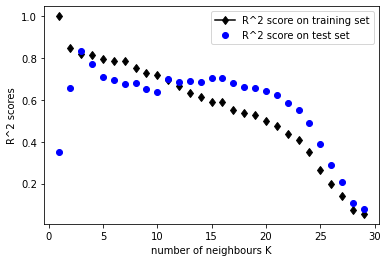

In [38]:
# finally, printing a graphic on train and test r^2 scores when changing K parameter from 1 to 14

for n_neighbors in range(1,30):
    plt.plot(n_neighbors, sk.metrics.r2_score(y_train, predict_func(X_train, X_train, y_train, n_neighbors)), 'r-d', color='black')
    plt.plot(n_neighbors, sk.metrics.r2_score(y_test, predict_func(X_test, X_train, y_train, n_neighbors)), 'o', color='blue')

    plt.xlabel('number of neighbours K')
    plt.ylabel('R^2 scores')

    plt.legend(["R^2 score on training set","R^2 score on test set"], loc = "best")

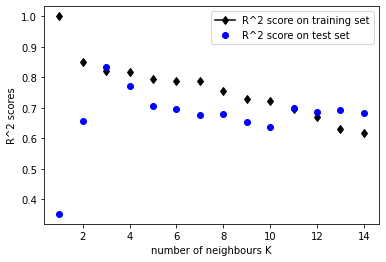

In [19]:
# and, comparing with the RNNR

for n_neighbors in range(1,15):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    plt.plot(n_neighbors, reg.score(X_train, y_train), 'r-d', color='black')
    plt.plot(n_neighbors, reg.score(X_test, y_test), 'o', color='blue')

    plt.xlabel('number of neighbours K')
    plt.ylabel('R^2 scores')

    plt.legend(["R^2 score on training set","R^2 score on test set"], loc = "best")